#   Последнее домашнее задание. Вариант 4.

##  Экспериментальная вероятность


In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import random

##Лабораторная работа 1

In [4]:
# Мешалкин Сборник задач по теории вероятностей n 30.

# В лифт 8-этажного дома на первом этаже вошли 5 человек.
# Предположим, что каждый из них с равной вероятностью может выйти на любом из этажей, 
# начиная со второго. Найти вероятность того, что все пятеро выйдут на разных этажах.



###Теретическое решение: 

5 человек, 7 этажей (1ый этаж не считаем)

нас интересуют: разные этажи.
Вероятность выйти на конкретном этаже = 1/7.
                      
1ый выходит на любом из 7 этажей (вер-ть = 7/7)


2ой выходит на любом из оставшихся 6: (вер-то = 6/7)


3ий = 5/7


4ый = 4/7


5ый = 3/7


Перемножим: 1 * 6/7 * 5/7 * 4/7 * 3/7 = 0.149937
                      
                      
 

###Эмпирическое решение

In [2]:
#  Задаем зерно датчика  a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=42, version=2)

#  Число экспериментов
n_exp = 100000000

#  пространство элементарных событий (этажи от 2 до 8)
A = list(range(2,9))

#  Обнуляем счетчик числа благоприятных событий
k_success=0

prob_tmp = []

#  n_exp испытаний,  бросаем пять кубиков, ой, то есть, человек
for i in range(n_exp):
    # 5 бросков "кубика" (кстати, можно решать задачу о 5 кубиках с 7 гранями)   
    # Выборка с возвращением - этажи могут повторяться
    d = random.choices(A, k=5)
    l0 = d.copy() 
    d0 = l0.pop(0) # список этажей без нулевого элемента
    
    l1 = d.copy()
    d1 = l1.pop(1)  # без 1го эл-та

    l2 = d.copy()
    d2 = l2.pop(2)
    
    l3 = d.copy()
    d3 = l3.pop(3)

    l4 = d.copy()
    d4 = l4.pop(4)
# так как этажи не могут повторяться, при удалении этажа из списка этажей такой же этаж не должен встретиться
# в оставшемся списке

    if d0 not in l0 and d1 not in l1 and d2 not in l2 and d3 not in l3 and d4 not in l4:
        #  Исход благоприятный
        k_success += 1

    prob_tmp.append(k_success/(i+1))
        
        
print('Вероятность того, что все выйдут на разных этажах, равна', np.round(k_success/n_exp, 6))




Вероятность того, что все выйдут на разных этажах, равна 0.150032


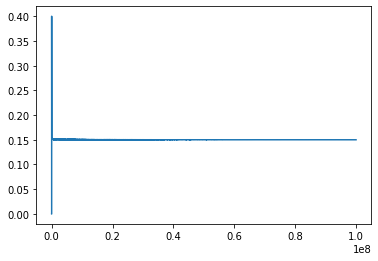

In [4]:
plt.plot(prob_tmp)

#plt.plot(prob_tmp[90000000 : 100000000])

#  plt.plot(prob_tmp[60000 : 80000])


#  plt.plot(prob_tmp[ : 1000])

#  plt.plot(prob_tmp[800 : 1000])




In [ ]:
plt.plot(prob_tmp[10000000 : 100000000])

Разница в 4ом знаке после запятой. Нормально.

##Лабораторная работа 2

###Экспериментальная вероятность

In [5]:
# Колода игральных карт содержит 52 карты, разделяющиеся на 4 различные масти по 13 карт в каждой. 
# Предположим, что колода тщательно перетасована, так что вытаскивание любой карты одинаково вероятно. 
# Вытащим 6 из них.
# Найти вероятность того, что среди этих карт не будет карт червовой масти.

#  Задаем зерно датчика a, 
#  опция version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

# Число экспериментов
n_exp = 10000


p_0 = 1          #   Вероятность, полученная на предыдущей попытке
delta_ = 1.1     #   

#   Колода карт, важна только масть
deck = ["s"] * 13 + ["h"] * 13 + ["d"] * 13 + ["c"] * 13 

while delta_ >= 0.00001:

#  Обнуляем счетчик
    count_ = 0

    for i in range(n_exp):             # Проводим n_exp экспериментов
        a = random.sample(deck, 6)     # Выбираем 6 карт без возвращения
        if "s" not in a:
            count_ += 1

    p= count_/n_exp              # Оцениваем вероятность
    delta_ = abs(p - p_0)        # Считаем изменение вероятности
    p_0 = p                      # Новая оценка вероятности заменяет старую
    n_exp = round(n_exp * 1.1)   # Увеличиваем число экспериментов

print(n_exp)
print(p)

1291408
0.16005356015764813


###Теоретическое решение

In [6]:
import scipy.special

all = scipy.special.binom(52, 6) # вариантов выбрать 6 карт из 52
n = 0
for i in range(0,7):
  for j in range(0, 7):
    for k in range(0,7):
      if i + j + k == 6: # перебираем все варианты, как могут распределиться масти
        n += scipy.special.binom(13,i)*scipy.special.binom(13,j)*scipy.special.binom(13,k)
# the two give the same results 
print(n/all)



0.16025835866261398


Разница в четвертом знаке после запятой. Сойдёт.

##Лабораторная работа 3

In [ ]:
# В квадрат с вершинами (0, 0), (0, 1), (1,0), (1,1) наудачу брошена точка М. 
# Пусть (x, y) будут ее координаты. 
# Предполагается, что вероятность попадания в область, лежащую целиком внутри квадрата, зависит лишь от площади этой области и пропорциональна ей.
# Найти для z = 1/4
# P{max(x, y)<z} 

###Теоретическое решение:
max(x, y) < 1/4 - это значит, что для любой точки значение координаты x < 1/4 и y < 1/4.
Эти точки лежат в квадрате со стороной 1/4. Площадь такого квадрата = 1/16 = 0.0625. Чтоб найти вероятность попасть в этот квадратик, нужно делить на площадь единичного квадрата.
Итого: вероятность равна 0.0625

###Решение методом эксперимента

In [7]:
# Число экспериментов
n_exp = 1000000


#  Задаем зерно датчика a 
#  version=2 требует преобразовать а в целое число, если требуется
random.seed(a=12345, version=2)

n = 0
for i in range(n_exp):                      # Проводим n_exp экспериментов
    a = np.random.uniform(0.0, 1.0, 2)      # Бросаем точку в квадрат [0,1]*[0,1]
    if a[0] < 0.25 and a[1] < 0.25:
        n += 1


print("Приближенный ответ после ", n_exp, "экспериментов ", n/n_exp)

print("Точный ответ ", 0.0625)



Приближенный ответ после  1000000 экспериментов  0.062725
Точный ответ  0.0625


И опять разница в четвёртом знаке после запятой. Хорошо.
